(100, 100, 3)


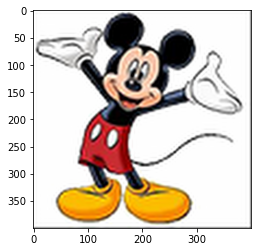

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.kernel_ridge import KernelRidge
import cv2

img = plt.imread('Mickey_Maus.png')
shape = img.shape

print(shape)

scale = 4
new_img = np.ones((shape[0]*scale, shape[1]*scale, 3))

X = np.zeros((shape[0]*shape[1], 2))
Y = {}
Y['R'] = np.zeros((shape[0]*shape[1], 1))
Y['B'] = np.zeros((shape[0]*shape[1], 1))
Y['G'] = np.zeros((shape[0]*shape[1], 1))

iter = 0
for i in range(shape[0]):
  for j in range(shape[1]):
    X[iter] = [i*scale, j*scale]
    Y['R'][iter], Y['B'][iter], Y['G'][iter] = img[i, j, 0], img[i, j, 1], img[i, j, 2]
    iter += 1

model = {}

alpha = 1e-3
gamma = 5e-2

for ch in ['R', 'B', 'G']:
  model[ch] = KernelRidge(kernel="rbf", alpha=alpha, gamma=gamma).fit(X, Y[ch])

for i in range(new_img.shape[0]):
  for j in range(new_img.shape[1]):
    pixel = np.asarray([[i, j]])
    new_img[i, j, 0] = model['R'].predict(pixel)
    new_img[i, j, 0] = new_img[i, j, 0] if new_img[i, j, 0] < 1 else 1
    new_img[i, j, 0] = new_img[i, j, 0] if new_img[i, j, 0] > 0 else 0
    new_img[i, j, 1] = model['B'].predict(pixel)
    new_img[i, j, 1] = new_img[i, j, 1] if new_img[i, j, 1] < 1 else 1
    new_img[i, j, 1] = new_img[i, j, 1] if new_img[i, j, 1] > 0 else 0
    new_img[i, j, 2] = model['G'].predict(pixel)
    new_img[i, j, 2] = new_img[i, j, 2] if new_img[i, j, 2] < 1 else 1
    new_img[i, j, 2] = new_img[i, j, 2] if new_img[i, j, 2] > 0 else 0

plt.imshow(new_img, cmap = plt.get_cmap(name = 'gray'))
plt.imsave('new_mickey.png', new_img, dpi=600)
plt.show()

2


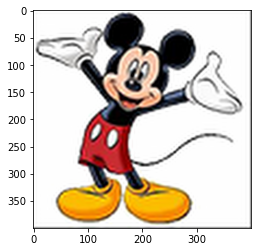

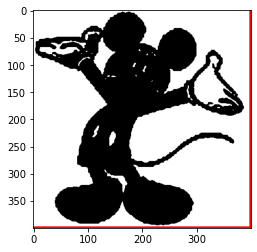

In [103]:
from sklearn.cluster import DBSCAN

color = np.sum(new_img, axis=-1)
idx = np.transpose(np.nonzero(color < 2.9))

db = DBSCAN(eps=2, min_samples=10).fit(idx)
print(db.n_features_in_)

plt.imshow(new_img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

clusters = np.ones(new_img.shape)
for label in range(db.n_features_in_):
    clusters[idx[db.labels_ == label, 0], idx[db.labels_ == label, 1], :] = [1-label, 0, 0]

plt.imsave('new_mickey_db_clusters.png', clusters, dpi=600)
plt.imshow(clusters, cmap = plt.get_cmap(name = 'gray'))
plt.show()

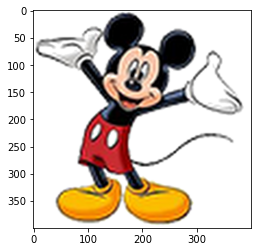

In [112]:
clusters = np.ones(new_img.shape)

clusters[idx[db.labels_ == 1, 0], idx[db.labels_ == 1, 1], :] = \
new_img[idx[db.labels_ == 1, 0], idx[db.labels_ == 1, 1], :]

plt.imsave('new_mickey_db.png', clusters, dpi=600)
plt.imshow(clusters, cmap = plt.get_cmap(name = 'gray'))
plt.show()